In [21]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from isometry_pursuit.transformation import exponential_transformation
from isometry_pursuit.loss import isometry_loss
from isometry_pursuit.algorithm import greedy, brute, group_basis_pursuit, group_lasso
import random

np.random.seed(1234)
random.seed(1234)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# vary C show results
wine = load_wine()
P_wine, D_wine = wine['data'].shape
print(f"D_wine = {D_wine}")
print(f"features = {wine['feature_names']}")
print(f"P_wine = {P_wine}")

wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

iris = load_iris()
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print(f"features = {iris['feature_names']}")
print("P_iris", P_iris)
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])

scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])

D_wine = 13
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
P_wine = 178
D_iris 4
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
P_iris 150


In [23]:
print("these are standarized to square root P")
print(np.linalg.norm(iris_standardized, axis = 0))
print(np.linalg.norm(wine_standardized, axis = 0))

these are standarized to square root P
[12.24744871 12.24744871 12.24744871 12.24744871]
[13.34166406 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406
 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406 13.34166406
 13.34166406]


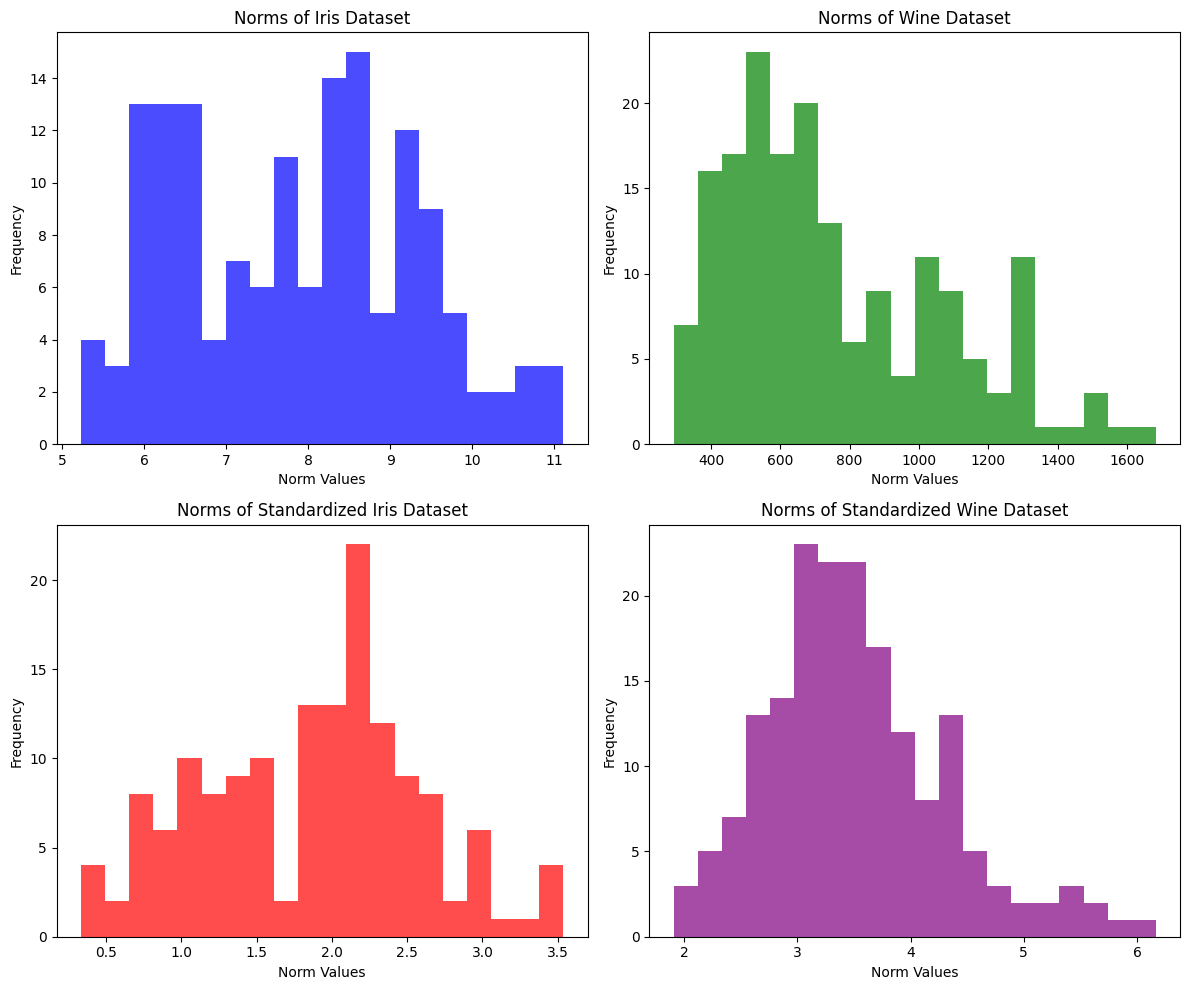

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Iris dataset
axs[0, 0].hist(np.linalg.norm(iris_df, axis=1), bins=20, alpha=0.7, color='blue')
axs[0, 0].set_title("Norms of Iris Dataset")

# Plot for Wine dataset
axs[0, 1].hist(np.linalg.norm(wine_df, axis=1), bins=20, alpha=0.7, color='green')
axs[0, 1].set_title("Norms of Wine Dataset")

# Plot for Standardized Iris dataset
axs[1, 0].hist(np.linalg.norm(iris_standardized, axis=1), bins=20, alpha=0.7, color='red')
axs[1, 0].set_title("Norms of Standardized Iris Dataset")

# Plot for Standardized Wine dataset
axs[1, 1].hist(np.linalg.norm(wine_standardized, axis=1), bins=20, alpha=0.7, color='purple')
axs[1, 1].set_title("Norms of Standardized Wine Dataset")

# Adding overall labels and adjusting layout
for ax in axs.flat:
    ax.set_xlabel('Norm Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
from isometry_pursuit.experiment import run_resampling_experiment
from isometry_pursuit.plot import box_plot
iris_results = run_resampling_experiment(iris_standardized, D_iris, frac = .1, R = 25, compute_brute = True)

Data subsampled dimension (4, 15)


/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 25637.56it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 8665.92it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27176.53it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


0it [00:00, ?it/s]/Users/samsonkoelle/isometry-pursuit/isometry_pursuit/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
1365it [00:00, 24724.26it/s]


Data subsampled dimension (4, 15)
Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 10121.39it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5861.24it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26651.76it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25172.02it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 8804.16it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5257.34it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 14294.69it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25969.45it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 21590.45it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 10622.08it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26817.30it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24132.43it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 7787.42it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 7092.16it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27118.73it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 20850.84it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 18379.95it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 14176.33it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27629.39it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 23914.19it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 14370.62it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 8966.02it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26794.21it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24508.04it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 20380.49it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12367.71it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 30430.66it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26156.55it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 18172.89it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 4230.69it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27697.03it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24935.65it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 3731.59it/s]


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 2369.66it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26350.98it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24604.31it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 16325.69it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 10479.02it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26877.35it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24891.09it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 12921.45it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5570.12it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27696.63it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24717.11it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 13653.33it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 6578.27it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 28349.43it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 24874.76it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 14820.86it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 10280.16it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 28629.56it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26469.40it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 22477.51it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 9512.33it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 30388.83it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25042.65it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 9020.01it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 11520.70it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 28942.90it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26168.99it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5649.66it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 7184.49it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27958.61it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25856.86it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 10554.36it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5740.90it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 28794.57it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26522.86it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 12725.44it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 4891.89it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26405.43it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25837.14it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 9727.05it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 6765.01it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 29733.40it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26504.32it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 8338.58it/s]


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 1766.77it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26429.93it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25557.44it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 8208.03it/s]


Computing brute force solution for dictionary dimension 4 and target_dimension 4


1it [00:00, 4128.25it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27979.93it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26609.65it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 22199.92it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 9275.33it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 29232.40it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 25921.48it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 10618.49it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5930.86it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 27551.74it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26689.78it/s]

Data subsampled dimension (4, 15)


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 8741.78it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 5663.39it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 29999.19it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 4


1365it [00:00, 26117.30it/s]


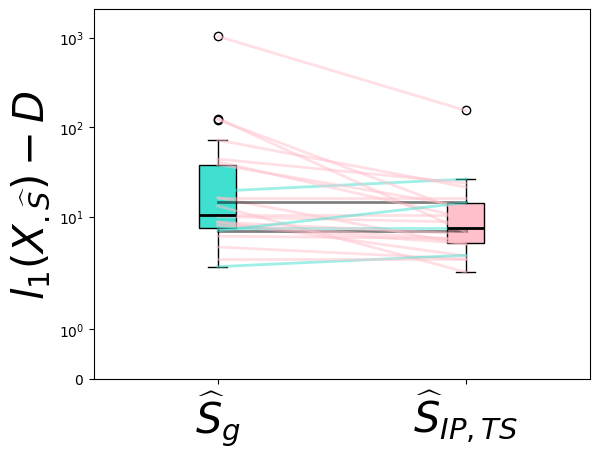

In [35]:
D = D_iris
box_plot(iris_results['Losses'],
         iris_results['Two-Stage Losses'],
         D,
         xlabels = [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'],
         ylabel = r'$l_1(X_{.\widehat {S}}) - D$',
         filename = '/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

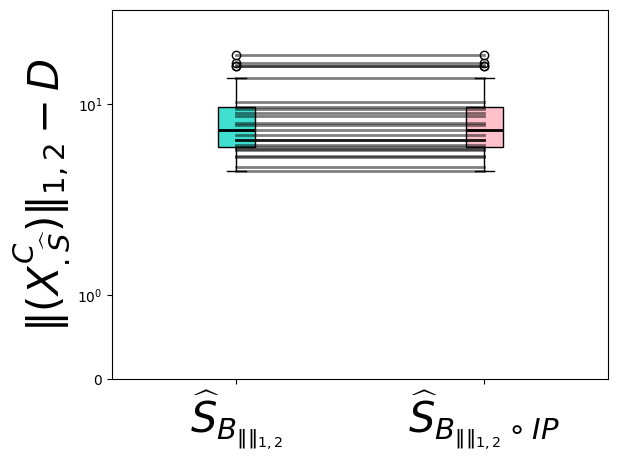

In [34]:
box_plot(iris_results['Brute Losses'],
         iris_results['Greedy Multitask Norms (Two-Stage)'],
         D,
         xlabels = [r'$\widehat S_{B_{\|\|_{1,2}}}$', r'$\widehat S_{B_{\|\|_{1,2}} \circ IP}$'],
         ylabel = r'$\|(X_{.\widehat {S}}^C)\|_{1,2} - D$',
         filename = '/Users/samsonkoelle/convexlocalisometry/figures/FigureS1')

In [ ]:
# okay, what we doing?
# we got 3 datasets - wine, iris, ethanol
# normalized versus unnormalized
# 3 values of C say


# 2 plots each across the 3 C values

# 1 figure is results for 3 datasets normalized

# 3 figures are results for 1 dataset C by normalized versus unnormalized

# 1 figures is for unstandardized group lasso norm ts versus brute across datasets and C values


In [242]:
print("Analyzing standardized wine data")
print("Iris dimension", wine_standardized.shape)
losses = []
support_cardinalities_basis_pursuit = []
two_stage_losses = []
random_two_stage_losses= []
greedy_multitask_norms = []
greedy_multitask_norms_two_stage = []
brute_losses = []
D = D_wine
for i in range(25):
    X = wine_standardized.sample(frac = .1).to_numpy().transpose() # .5
    print("Iris subsampled dimension", X.shape)
    output = greedy(X, isometry_loss_power, D, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss_power(X[:,output])
    losses.append(loss)
    
    output = greedy(X, group_lasso_norm, D, []) 
    
    greedy_multitask_norms.append(group_lasso_norm(np.linalg.inv(X[:,output])))
    
    data_transformed = exponential_transformation(X, power = power)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    
    support_cardinalities_basis_pursuit.append(len(basis_pursuit_indices))
    
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss_power, D))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss_power(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    
    
    two_stage_multitask = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], group_lasso_norm, D))] # plainly this is too hard 178**13 combinations
    greedy_multitask_norms_two_stage.append(group_lasso_norm(np.linalg.inv(X[:,two_stage_multitask])))

    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss_power(X[:,random_indices]))
    
    brute_solution = brute(X[:,:], group_lasso_norm, D)
    brute_losses.append(group_lasso_norm(np.linalg.inv(X[:,brute_solution])))

    

Analyzing standardized wine data
Iris dimension (178, 13)
Iris subsampled dimension (13, 18)


/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 20881.63it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 54929.16it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50976.35it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 21983.71it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 57726.55it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51163.89it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 17547.68it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 49050.04it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 49788.78it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 18347.36it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 46531.36it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50269.55it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 19238.07it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 53381.19it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50390.22it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 19731.40it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50200.66it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 47200.61it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 19647.55it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 54468.10it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 47215.24it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 19475.87it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50841.70it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 47988.48it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22068.49it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51280.55it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52926.69it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 20699.38it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 47828.80it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52904.87it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22439.66it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 56094.54it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 53523.25it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22615.51it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 56991.97it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52768.30it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22446.83it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 57020.81it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 53946.52it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22450.58it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 56002.92it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51039.26it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 21628.13it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 54563.48it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51670.52it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 19031.14it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 51052.21it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52024.11it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 21082.01it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 13


560it [00:00, 47986.81it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51196.25it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 21536.88it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 57502.65it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 51001.89it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 22612.51it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 56412.24it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52150.41it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 18772.85it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 50633.75it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 52807.38it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 19076.60it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 45437.94it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 46330.31it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 20116.65it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 52398.80it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 47731.49it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 21581.47it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 55132.13it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 53371.82it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 20858.73it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 46342.46it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 49530.08it/s]


Iris subsampled dimension (13, 18)
Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 21455.99it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 13


2380it [00:00, 52910.10it/s]


Computing brute force solution for dictionary dimension 18 and target_dimension 13


8568it [00:00, 50176.83it/s]


In [ ]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
# plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
# plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

In [185]:
losses = []
greedy_multitask_losses = []
nbp = []
two_stage_losses = []
random_two_stage_losses= []
D_iris =4
for i in range(25):
    X = iris_standardized.sample(frac = .5).to_numpy().transpose()
#     X = iris_standardized.sample(axis = 1, frac = .5).to_numpy()
# TODO (Sam): enable c in greedy / isometry_loss
    output = greedy(X, isometry_loss_power, D_iris, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss_power(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X, power = power)
#     output = greedy(data_transformed, group_lasso_norm, D_iris, []) # plainly brute is too hard 178**13 combinations    
    
    
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))
    #     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss_power, D_iris))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss_power(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    greedy_multitask_losses.append(group_lasso_norm(X[:,two_stage_output]))
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss_power(X[:,random_indices]))

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 22184.26it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 22544.83it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 21913.81it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 10916.98it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 16320.25it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 20242.78it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 14367.34it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 17262.54it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19555.17it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 6210.10it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 21352.82it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 18642.53it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 15433.20it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 24224.53it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 18063.32it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 4


126it [00:00, 24155.88it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 15446.74it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 20164.92it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 16990.16it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 17499.18it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 26090.93it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 21305.30it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 16973.13it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 21868.11it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 21550.30it/s]


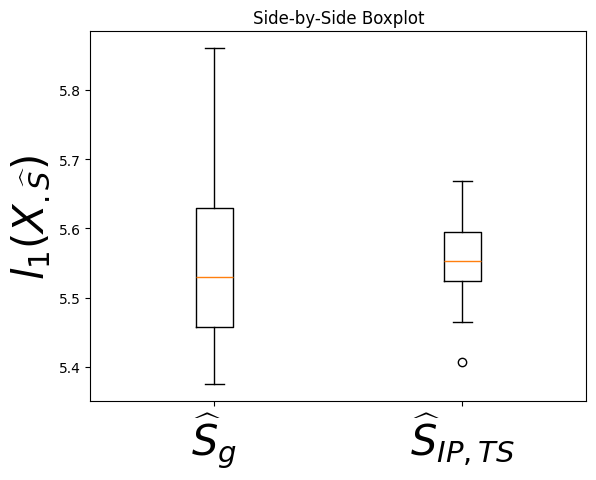

In [107]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

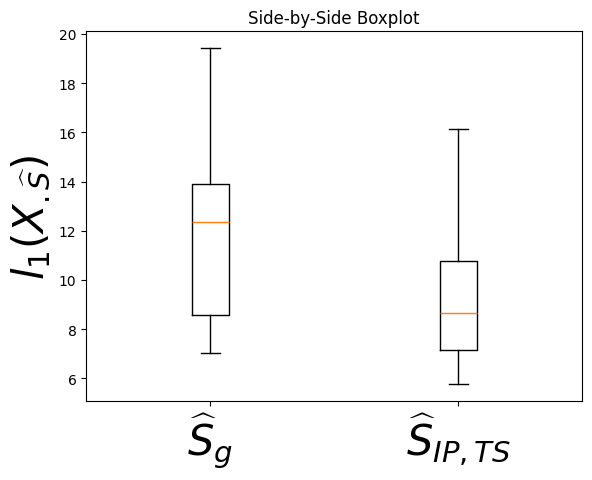

In [65]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

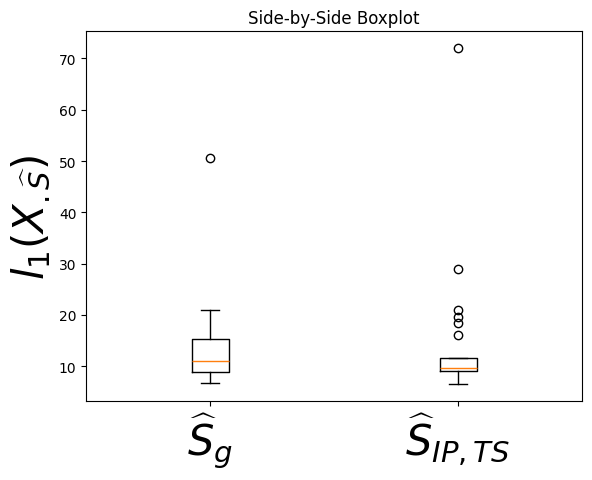

In [67]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

In [108]:
losses = []
two_stage_losses = []
nbp = []
random_two_stage_losses= []
dimension = 6
for i in range(25):
    X = wine_standardized.sample(frac = .5).to_numpy().transpose()[:dimension,:]
    output = greedy(X, isometry_loss, dimension, []) # plainly brute is too hard 178**13 combinations
#     output = brute(X, isometry_loss, dimension)
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))

    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, dimension))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 25575.41it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 25010.17it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 26647.15it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 28273.74it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 27329.76it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 6


5005it [00:00, 28233.44it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 24943.75it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 28037.82it/s]


Computing brute force solution for dictionary dimension 15 and target_dimension 6


5005it [00:00, 27373.96it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 28663.88it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 6


462it [00:00, 25412.69it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 24537.88it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 28848.40it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 6


1716it [00:00, 27664.96it/s]


Computing brute force solution for dictionary dimension 16 and target_dimension 6


8008it [00:00, 27724.48it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 26225.40it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 26005.43it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 26490.34it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 6


12376it [00:00, 28938.86it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 25231.66it/s]


Computing brute force solution for dictionary dimension 17 and target_dimension 6


12376it [00:00, 26509.69it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 25806.95it/s]


Computing brute force solution for dictionary dimension 14 and target_dimension 6


3003it [00:00, 23966.31it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 6


1716it [00:00, 27196.63it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 6


924it [00:00, 25533.41it/s]


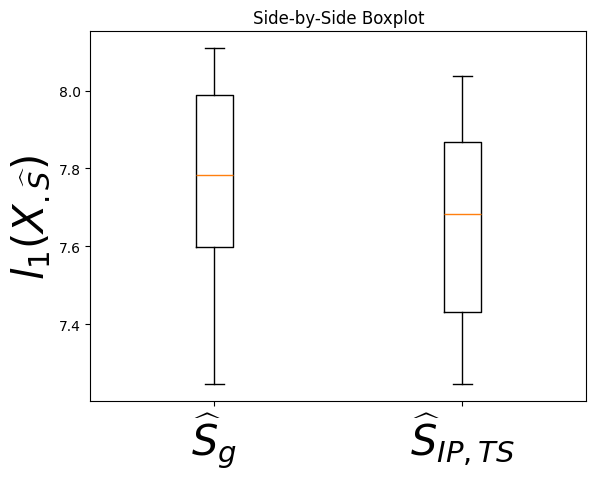

In [109]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

In [8]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

5.734369034010522
0.18991729870508334
5.618834928412273
0.12878299514658612
11.48
1.389100428334827
